In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Carregando os dados

In [2]:
# carregando os dados 
my_data = np.array(np.genfromtxt('data/breast-cancer-wisconsin.data.txt', delimiter=','), dtype='float64')
# no exemplo da internet ele usava esse StandardScaler (não sei pra que serve)
# scaler = StandardScaler()
# my_data = scaler.fit_transform(my_data)
y = my_data[:,-1:].astype(int).ravel()
X = my_data[:,1:-1]
X[np.isnan(X) == True] = 0

## SVM com kernel linear

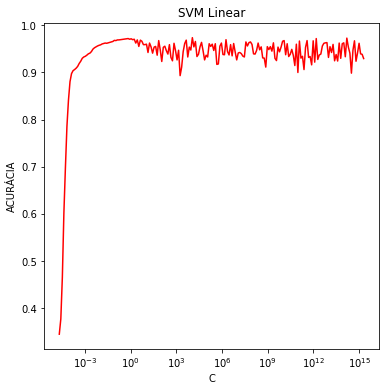

Maior acurácia: 0.9738095238095238 referente ao C: 11085.329041326237


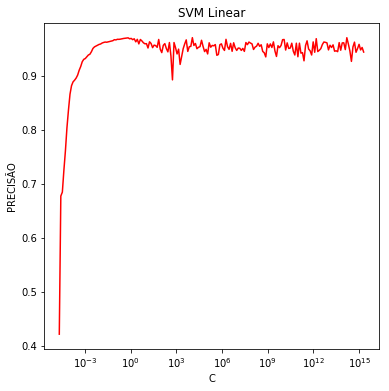

Maior precisão: 0.970885101192239 referente ao C: 11085.329041326237


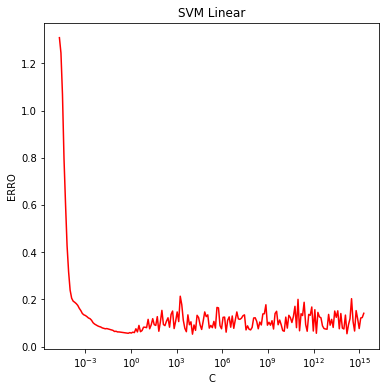

Menor erro: 0.05238095238095238 referente ao C: 11085.329041326237

Tempo médio de fit: 8.355316281318665 milissegundos


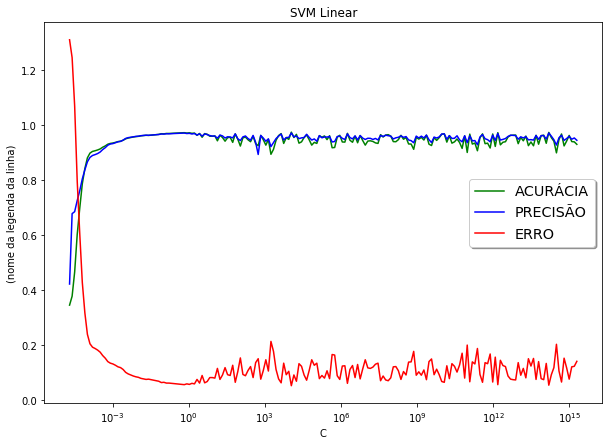

Maior acurácia: 0.9738095238095238 referente ao C: 11085.329041326237
Maior precisão: 0.970885101192239 referente ao C: 11085.329041326237
Menor erro: 0.05238095238095238 referente ao C: 11085.329041326237

Tempo médio de fit: 8.355316281318665 milissegundos


In [25]:
C_range = 2*np.logspace(-5, 15, 200)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3)
grid = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=cv, scoring=["precision_macro","accuracy","neg_mean_absolute_error"],refit=False, return_train_score=False)
grid.fit(X, y)

accur = grid.cv_results_["mean_test_accuracy"]
precis = grid.cv_results_['mean_test_precision_macro']
error = -grid.cv_results_['mean_test_neg_mean_absolute_error']

ax = plt.figure(1, figsize=(6,6)).gca()
plt.plot(C_range,accur, "r-")
plt.ylabel("ACURÁCIA")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM Linear")
plt.show()
C_accur_best = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best,"referente ao C:", C_accur_best )

ax = plt.figure(1, figsize=(6,6)).gca()
plt.plot(C_range,precis, "r-")
plt.ylabel("PRECISÃO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM Linear")
plt.show()
C_prec_best = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best,"referente ao C:", C_prec_best )

ax = plt.figure(1, figsize=(6,6)).gca()
plt.plot(C_range,error, "r-")
plt.ylabel("ERRO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM Linear")
plt.show()
C_error_best = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best,"referente ao C:", C_error_best )

print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

############################### GRÁFICO UNIFICADO ####################################

ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,accur, "g-", label='ACURÁCIA')
plt.plot(C_range,precis, "b-", label='PRECISÃO')
plt.plot(C_range,error, "r-", label='ERRO')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM Linear")
plt.show()
C_accur_best = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best,"referente ao C:", C_accur_best )
C_prec_best = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best,"referente ao C:", C_prec_best )
C_error_best = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best,"referente ao C:", C_error_best )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

In [4]:
# Repita para um kernel gaussiano, e com σ fixo
# Essa parte tá complicada porque aparentemente não tem nenhum kernel com esse nome no scikit learn
# li na internet que o kernel "rbf" é gaussiano 
# mas o próximo item do trabalho é pedindo pra fazer com kernel "fbr"
# que eu suponho que seja a tradução pra português de rbf. 
# também não sei oq significa esse σ fixo

#outras opções de kernel que achei na internet foram: polynomial e sigmoid.

### SVM com kernel FBR

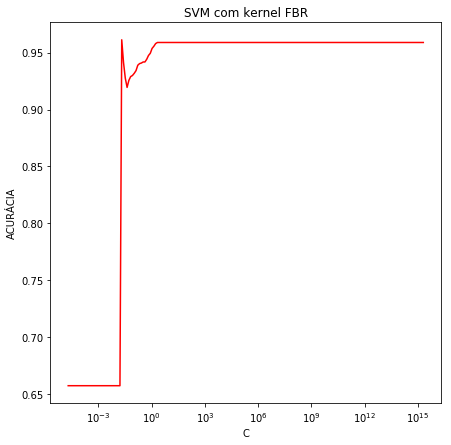

Maior acurácia: 0.9614285714285714 referente ao C: 0.020706436865913252


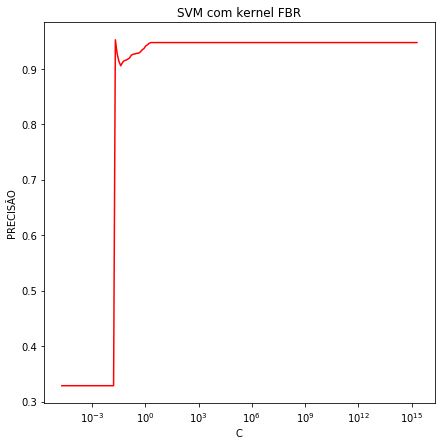

Maior precisão: 0.9524098908945852 referente ao C: 0.020706436865913252


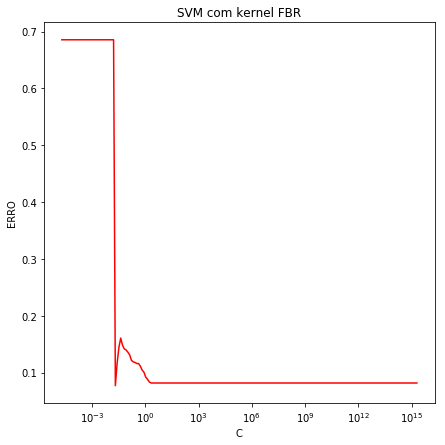

Menor erro: 0.07714285714285714 referente ao C: 0.020706436865913252

Tempo médio de fit: 5.341555595397948 milissegundos


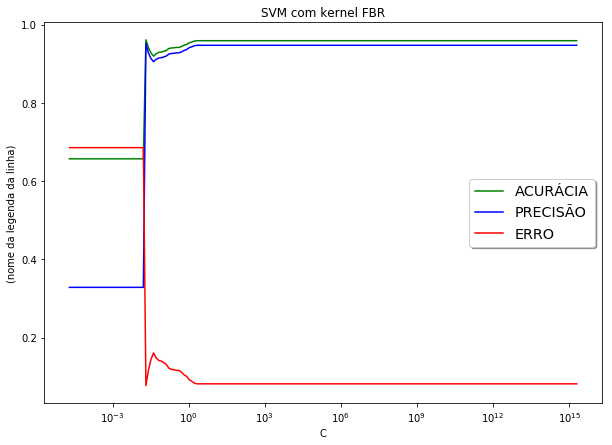

Maior acurácia: 0.9614285714285714 referente ao C: 0.020706436865913252
Maior precisão: 0.9524098908945852 referente ao C: 0.020706436865913252
Menor erro: 0.07714285714285714 referente ao C: 0.020706436865913252

Tempo médio de fit: 5.341555595397948 milissegundos


In [26]:

C_range = 2*np.logspace(-5, 15, 200)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3)
grid = GridSearchCV(svm.SVC(kernel="rbf"), param_grid=param_grid, cv=cv, scoring=["precision_macro","accuracy","neg_mean_absolute_error"],refit=False, return_train_score=False)
grid.fit(X, y)

accur = grid.cv_results_["mean_test_accuracy"]
precis = grid.cv_results_['mean_test_precision_macro']
error = -grid.cv_results_['mean_test_neg_mean_absolute_error']

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,accur, "r-")
plt.ylabel("ACURÁCIA")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel FBR")
plt.show()
C_accur_best = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best,"referente ao C:", C_accur_best )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,precis, "r-")
plt.ylabel("PRECISÃO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel FBR")
plt.show()
C_prec_best = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best,"referente ao C:", C_prec_best )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,error, "r-")
plt.ylabel("ERRO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel FBR")
plt.show()
C_error_best = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best,"referente ao C:", C_error_best )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

############################### GRÁFICO UNIFICADO ####################################

ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,accur, "g-", label='ACURÁCIA')
plt.plot(C_range,precis, "b-", label='PRECISÃO')
plt.plot(C_range,error, "r-", label='ERRO')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel FBR")
plt.show()
C_accur_best = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best,"referente ao C:", C_accur_best )
C_prec_best = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best,"referente ao C:", C_prec_best )
C_error_best = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best,"referente ao C:", C_error_best )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

## SVM com kernel Polinomial

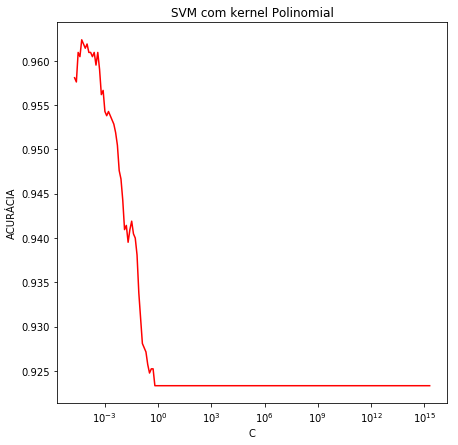

Maior acurácia: 0.9623809523809523 referente ao C: 5.047078340869532e-05


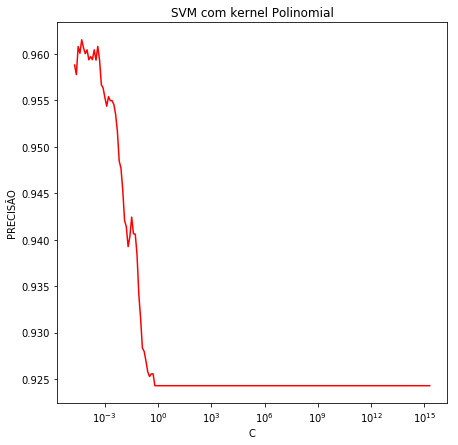

Maior precisão: 0.9615377377826699 referente ao C: 5.047078340869532e-05


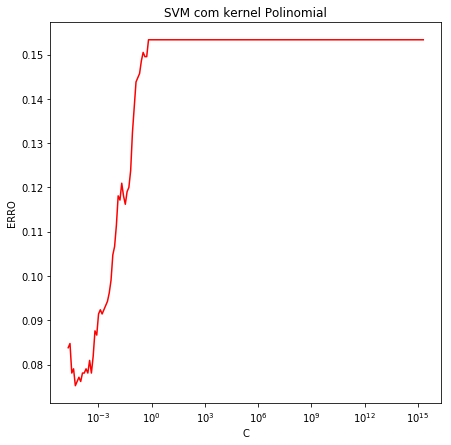

Menor erro: 0.07523809523809524 referente ao C: 5.047078340869532e-05

Tempo médio de fit: 11.151751160621645 milissegundos


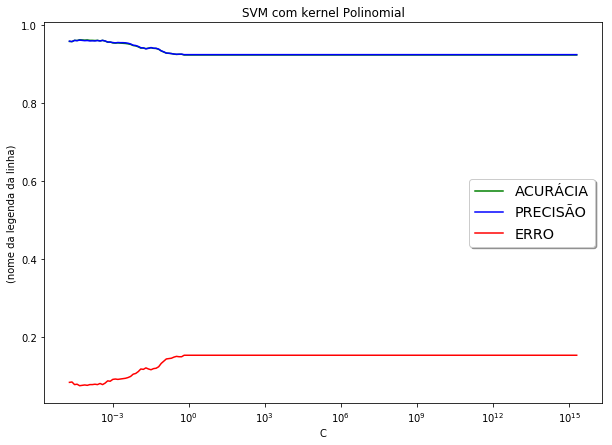

Maior acurácia: 0.9623809523809523 referente ao C: 5.047078340869532e-05
Maior precisão: 0.9615377377826699 referente ao C: 5.047078340869532e-05
Menor erro: 0.07523809523809524 referente ao C: 5.047078340869532e-05

Tempo médio de fit: 11.151751160621645 milissegundos


In [29]:
C_range = 2*np.logspace(-5, 15, 200)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3)
grid = GridSearchCV(svm.SVC(kernel="poly", coef0=1.0), param_grid=param_grid, cv=cv, scoring=["precision_macro","accuracy","neg_mean_absolute_error"],refit=False, return_train_score=False)
grid.fit(X, y)


accur = grid.cv_results_["mean_test_accuracy"]
precis = grid.cv_results_['mean_test_precision_macro']
error = -grid.cv_results_['mean_test_neg_mean_absolute_error']

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,accur, "r-")
plt.ylabel("ACURÁCIA")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Polinomial")
plt.show()
C_accur_best = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best,"referente ao C:", C_accur_best )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,precis, "r-")
plt.ylabel("PRECISÃO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Polinomial")
plt.show()
C_prec_best = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best,"referente ao C:", C_prec_best )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,error, "r-")
plt.ylabel("ERRO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Polinomial")
plt.show()
C_error_best = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best,"referente ao C:", C_error_best )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

############################### GRÁFICO UNIFICADO ####################################

ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,accur, "g-", label='ACURÁCIA')
plt.plot(C_range,precis, "b-", label='PRECISÃO')
plt.plot(C_range,error, "r-", label='ERRO')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Polinomial")
plt.show()
C_accur_best = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best,"referente ao C:", C_accur_best )
C_prec_best = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best,"referente ao C:", C_prec_best )
C_error_best = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best,"referente ao C:", C_error_best )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

## SVM com kernel Sigmóide

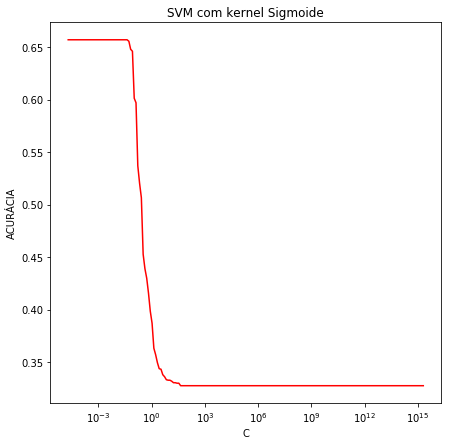

Maior acurácia: 0.6571428571428571 referente ao C: 2e-05


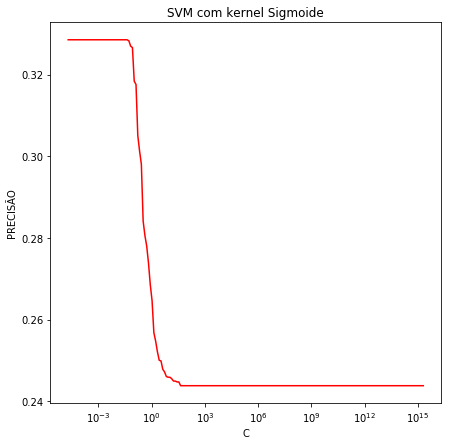

Maior precisão: 0.32857142857142857 referente ao C: 2e-05


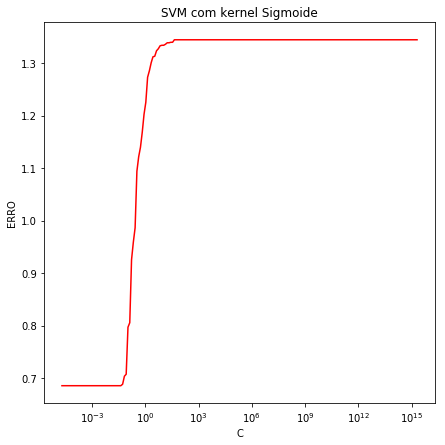

Menor erro: 0.6857142857142857 referente ao C: 2e-05

Tempo médio de fit: 8.692415714263918 milissegundos


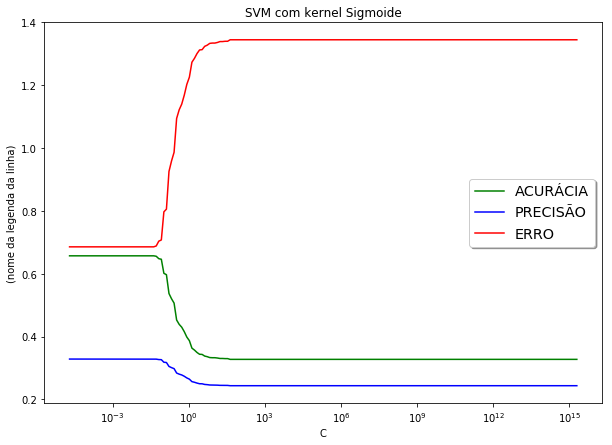

Maior acurácia: 0.6571428571428571 referente ao C: 2e-05
Maior precisão: 0.32857142857142857 referente ao C: 2e-05
Menor erro: 0.6857142857142857 referente ao C: 2e-05

Tempo médio de fit: 8.692415714263918 milissegundos


In [28]:
C_range = 2*np.logspace(-5, 15, 200)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3)
grid = GridSearchCV(svm.SVC(kernel="sigmoid"), param_grid=param_grid, cv=cv, scoring=["precision_macro","accuracy","neg_mean_absolute_error"],refit=False, return_train_score=False)
grid.fit(X, y)


accur = grid.cv_results_["mean_test_accuracy"]
precis = grid.cv_results_['mean_test_precision_macro']
error = -grid.cv_results_['mean_test_neg_mean_absolute_error']

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,accur, "r-")
plt.ylabel("ACURÁCIA")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Sigmoide")
plt.show()
C_accur_best = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best,"referente ao C:", C_accur_best )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,precis, "r-")
plt.ylabel("PRECISÃO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Sigmoide")
plt.show()
C_prec_best = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best,"referente ao C:", C_prec_best )

ax = plt.figure(1, figsize=(7,7)).gca()
plt.plot(C_range,error, "r-")
plt.ylabel("ERRO")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Sigmoide")
plt.show()
C_error_best = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best,"referente ao C:", C_error_best )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")

############################### GRÁFICO UNIFICADO ####################################

ax = plt.figure(1, figsize=(10,7)).gca()
plt.plot(C_range,accur, "g-", label='ACURÁCIA')
plt.plot(C_range,precis, "b-", label='PRECISÃO')
plt.plot(C_range,error, "r-", label='ERRO')
legend = ax.legend(loc='center right', shadow=True, fontsize='x-large')
plt.ylabel("(nome da legenda da linha)")
plt.xlabel("C")
plt.xscale('log')
plt.title("SVM com kernel Sigmoide")
plt.show()
C_accur_best = C_range[np.argmin(grid.cv_results_['rank_test_accuracy'])]
accur_best = grid.cv_results_['mean_test_accuracy'][np.argmin(grid.cv_results_['rank_test_accuracy'])]
print("Maior acurácia:", accur_best,"referente ao C:", C_accur_best )
C_prec_best = C_range[np.argmin(grid.cv_results_['rank_test_precision_macro'])]
prec_best = grid.cv_results_['mean_test_precision_macro'][np.argmin(grid.cv_results_['rank_test_precision_macro'])]
print("Maior precisão:", prec_best,"referente ao C:", C_prec_best )
C_error_best = C_range[np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
error_best = -grid.cv_results_['mean_test_neg_mean_absolute_error'][np.argmin(grid.cv_results_['rank_test_neg_mean_absolute_error'])]
print("Menor erro:", error_best,"referente ao C:", C_error_best )


print()
print("Tempo médio de fit:", np.mean(grid.cv_results_['mean_fit_time'])*1000, "milissegundos")